In [28]:
import random
import math

class Endpoint:
    def __init__(self, l=30, t=0, a=1, b=0.5, cwnd=10):
#         k = random.randint(10, 30)  # k is a random number more than 15
        self.data_packets = [x for x in range(1, l+1)]
        self.a = a  # Additive increase parameter
        self.b = b  # Multiplicative decrease parameter
        self.cwnd = cwnd  # Initial window size
        self.i = 0  # Index to differentiate the packets
        self.cwnd_tracker = [cwnd]
        self.length = l

#     def aimd_algorithm(self):
#         _, status = self.data_packets[self.i]
        
#         # Check the status of the packet and adjust the cwnd accordingly
#         if status == 'Transfer':
#             self.cwnd += self.a  # Additive increase
#         else:
#             self.cwnd = max(math.floor(self.cwnd * self.b), 1)  # Multiplicative decrease but not less than 1
        
#         self.i += self.cwnd  # Move to the next packet

#         if self.i+self.cwnd >= self.m:
#             self.cwnd = self.m-self.i + 1

#         self.cwnd_tracker.append(cwnd)
        
#         return self.cwnd  # Return the updated cwnd
    
    def md(self):
        self.cwnd = max(math.floor(self.cwnd * self.b), 1)  # Multiplicative decrease but not less than 1

        self.i += self.cwnd  # Move to the next packet
        
        # record down the time
        
        self.cwnd_tracker.append(self.cwnd)
        
            
    def ai(self):

        # change this for dynamic ai

        self.cwnd += 10/self.cwnd**0.5  # Additive increase
        
        self.i += self.cwnd  # Move to the next packet
            
        self.cwnd_tracker.append(self.cwnd)
        
        
        
            
class Cable:
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth  # Fixed bandwidth of the cable
        self.endpoints = []  # Endpoints connected to the cable
        self.completed_endpoints = [] # Data about the completed endpoints

    def add_endpoint(self, endpoint):
        self.endpoints.append(endpoint)  # Add an endpoint to the cable
        
    def remove_completed_endpoints(self):
        # Create a list of endpoints that have finished sending all packets
        completed_endpoints = [endpoint for endpoint in self.endpoints if endpoint.i >= len(endpoint.data_packets)]

        # Remove the completed endpoints from the endpoints list
        for endpoint in completed_endpoints:
            self.completed_endpoints.append(endpoint)
            self.endpoints.remove(endpoint)

    def get_bandwidth_usage(self, timer):
        sums = 0 
        for endpoint in self.endpoints:
            sums+=endpoint.cwnd_tracker[timer]
        return sums

    def transfer_data(self):
        timer = 0 
        bandwidth_usage = []
        while len(self.endpoints) > 0:
            
            bandwidth_used = self.get_bandwidth_usage(timer)
            if  bandwidth_used >= self.bandwidth:
                print("Bandwidth exceeded during transfer. Stopping further transfers.")
                for endpoint in self.endpoints:
                    endpoint.md()
            else:
                print("No congestion. Continue transfer.")
                for endpoint in self.endpoints:
                    endpoint.ai()
            bandwidth_usage.append(bandwidth_used)
            self.remove_completed_endpoints()
            timer+=1
        return bandwidth_usage
            





In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_bandwidth_usage_chart(cable):
    # Determine the maximum time step by finding the longest cwnd_tracker among all endpoints
    max_time_steps = max([len(endpoint.cwnd_tracker) for endpoint in cable.completed_endpoints], default=0)

    # Prepare the data for plotting
    data = np.zeros((len(cable.completed_endpoints), max_time_steps))
    for i, endpoint in enumerate(cable.completed_endpoints):
        cwnd_tracker_length = len(endpoint.cwnd_tracker)
        data[i, :cwnd_tracker_length] = endpoint.cwnd_tracker
    
    # Time steps for x-axis
    time_steps = np.arange(max_time_steps)

    # Create the stacked line chart
    plt.figure(figsize=(12, 8))
    plt.stackplot(time_steps, data, labels=[f'Endpoint {i+1}' for i in range(len(cable.completed_endpoints))])

    # Plotting total bandwidth as a horizontal line
    plt.axhline(y=cable.bandwidth, color='r', linestyle='--', label='Total Bandwidth')

    # Adding chart elements
    plt.title('Bandwidth Usage by Endpoint')
    plt.xlabel('Time Step')
    plt.ylabel('Bandwidth Usage (cwnd size)')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Show the plot
    plt.show()


In [24]:
import numpy as np
import statistics

def cal_metrics(usage, bandwidth):
    utilization = np.mean(usage) / bandwidth
    
    max_value = max(usage)
    max_indexes_usage = [i for i, v in enumerate(usage) if v == max_value]
    recovery_speed = [max_indexes_usage[i+1] - max_indexes_usage[i] for i in range(len(max_indexes_usage) - 1)]
    
#     mean_endpoint_throughput = []
#     for endpoint in cable.completed_endpoints:  # Assuming completed_endpoints includes all endpoints that have transmitted data
#         mean_throughput = statistics.mean(endpoint.cwnd_tracker)
#         mean_endpoint_throughput.append(mean_throughput)
#     fairness = statistics.stdev(mean_endpoint_throughput) if mean_endpoint_throughput else 0  # Handle case with no endpoints
    
    no_of_congestion = usage.count(max_value)
    
    # Corrected variable name from throughput to utilization
    print("Mean Utilization:", utilization)
    print("Recovery Speed:", recovery_speed)
#     print("Fairness SD:", fairness)
    print("No of Congestion:", no_of_congestion)

    

### a=1 b=0.5: 2 endpoints

No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion.

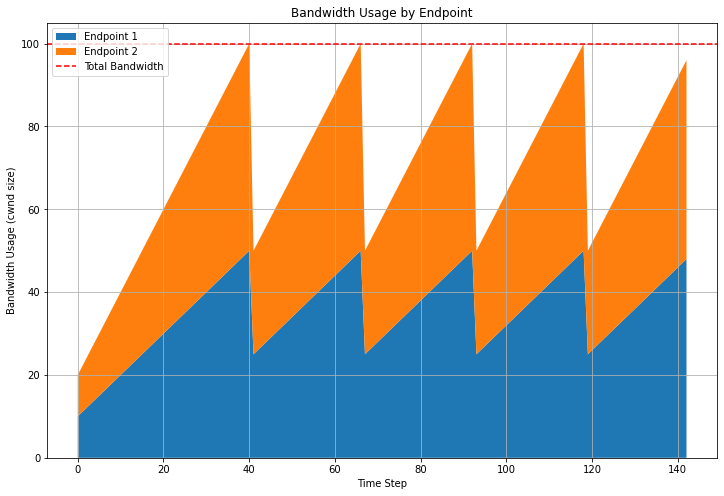

In [6]:
# Create a cable with a fixed bandwidth
cable_2 = Cable(bandwidth=100)

# Create endpoints with fixed a, b, and initial cwnd
endpoint1 = Endpoint(t=0, l=5000, a=1, b=0.5, cwnd=10)
endpoint2 = Endpoint(t=1, l=5000, a=1, b=0.5, cwnd=10)

# Add endpoints to the cable
cable_2.add_endpoint(endpoint1)
cable_2.add_endpoint(endpoint2)

# Start the data transfer
usage = cable_2.transfer_data()
print(usage)

draw_bandwidth_usage_chart(cable_2)


In [7]:
cal_metrics(usage, cable_2.bandwidth)

Mean Utilization: 0.701830985915493
Recovery Speed: 26
No of Congestion: 4


### a>1 b=0.5: 2 endpoints

No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Con

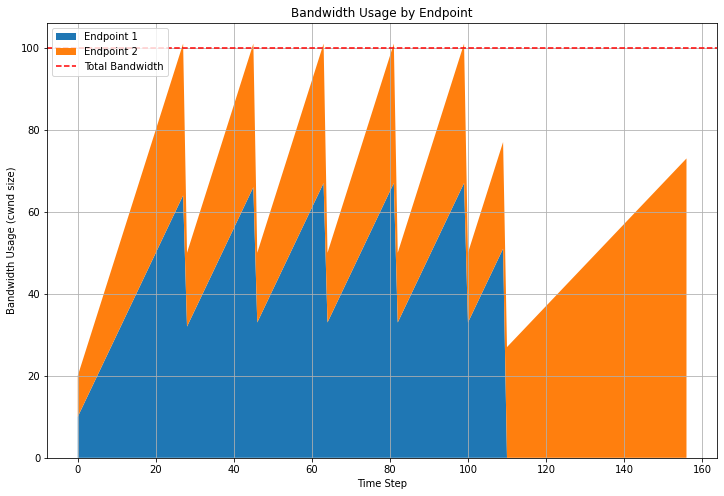

In [11]:
# Create a cable with a fixed bandwidth
cable_2 = Cable(bandwidth=100)

# Set endpoint 1 to have a=2
endpoint1 = Endpoint(t=0, l=5000, a=2, b=0.5, cwnd=10)
endpoint2 = Endpoint(t=1, l=5000, a=1, b=0.5, cwnd=10)

# Add endpoints to the cable
cable_2.add_endpoint(endpoint1)
cable_2.add_endpoint(endpoint2)

# Start the data transfer
usage = cable_2.transfer_data()
print(usage)

draw_bandwidth_usage_chart(cable_2)


In [12]:
cal_metrics(usage, cable_2.bandwidth)

Mean Utilization: 0.6404487179487179
Recovery Speed: 18
No of Congestion: 5


### a>1 b=0.5: 2 endpoints

No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Con

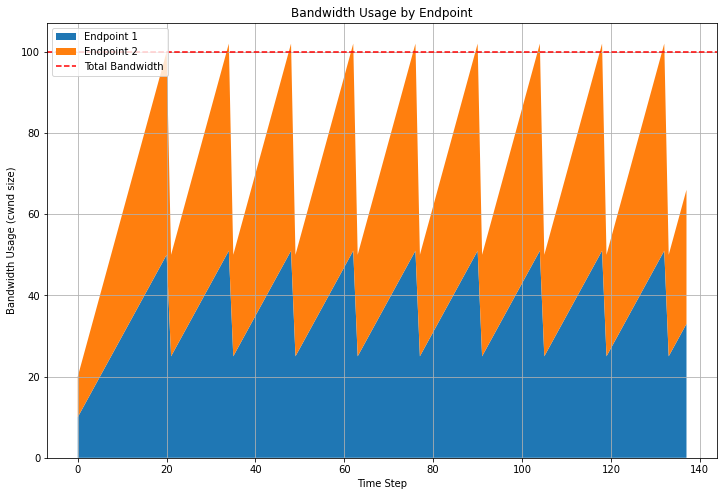

In [25]:
# Create a cable with a fixed bandwidth
cable_2 = Cable(bandwidth=100)

# Set endpoint 1 to have a=2
endpoint1 = Endpoint(t=0, l=5000, a=2, b=0.5, cwnd=10)
endpoint2 = Endpoint(t=1, l=5000, a=2, b=0.5, cwnd=10)

# Add endpoints to the cable
cable_2.add_endpoint(endpoint1)
cable_2.add_endpoint(endpoint2)

# Start the data transfer
usage = cable_2.transfer_data()
print(usage)

draw_bandwidth_usage_chart(cable_2)


In [26]:
cal_metrics(usage, cable_2.bandwidth)

Mean Utilization: 0.7296350364963503
Recovery Speed: [14, 14, 14, 14, 14, 14, 14]
No of Congestion: 8


### a=1 b>0.5: 2 endpoints

No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion.

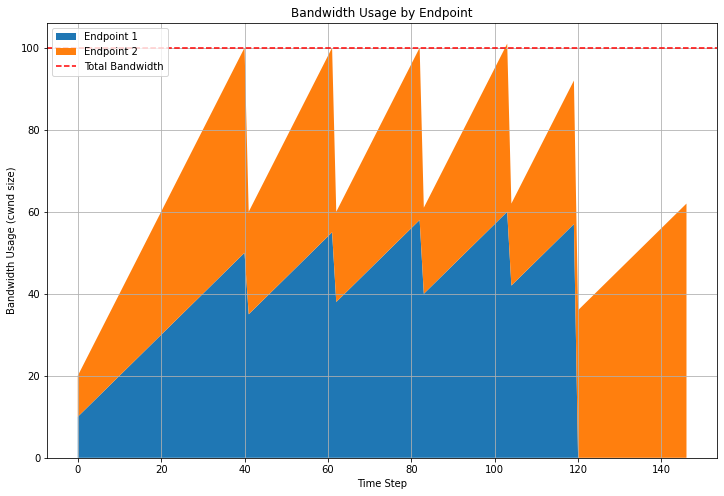

In [16]:
# Create a cable with a fixed bandwidth
cable_2 = Cable(bandwidth=100)

# Set endpoint 1 to have a=2
endpoint1 = Endpoint(t=0, l=5000, a=1, b=0.7, cwnd=10)
endpoint2 = Endpoint(t=1, l=5000, a=1, b=0.5, cwnd=10)

# Add endpoints to the cable
cable_2.add_endpoint(endpoint1)
cable_2.add_endpoint(endpoint2)

# Start the data transfer
usage = cable_2.transfer_data()
print(usage)

draw_bandwidth_usage_chart(cable_2)


In [17]:
cal_metrics(usage, cable_2.bandwidth)

Mean Utilization: 0.6819863013698629
Recovery Speed: 21
No of Congestion: 3


### a=1 b>0.5: 2 endpoints

No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion.

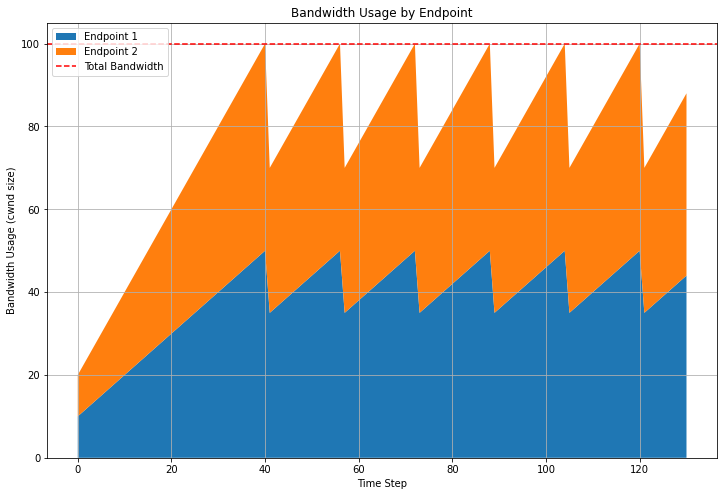

In [18]:
# Create a cable with a fixed bandwidth
cable_2 = Cable(bandwidth=100)

# Set endpoint 1 to have a=2
endpoint1 = Endpoint(t=0, l=5000, a=1, b=0.7, cwnd=10)
endpoint2 = Endpoint(t=1, l=5000, a=1, b=0.7, cwnd=10)

# Add endpoints to the cable
cable_2.add_endpoint(endpoint1)
cable_2.add_endpoint(endpoint2)

# Start the data transfer
usage = cable_2.transfer_data()
print(usage)

draw_bandwidth_usage_chart(cable_2)


In [19]:
cal_metrics(usage, cable_2.bandwidth)

Mean Utilization: 0.7663076923076924
Recovery Speed: 16
No of Congestion: 6


### a=1 b=0.5 : 10 endpoints 

In [8]:
cable_10 = Cable(100)

for i in range(0, 10):
    endpoint = Endpoint(t=0, l=5000, a=1, b=0.5, cwnd=10)
    cable_10.add_endpoint(endpoint)
    
usage = cable_10.transfer_data()
print(usage)


Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.


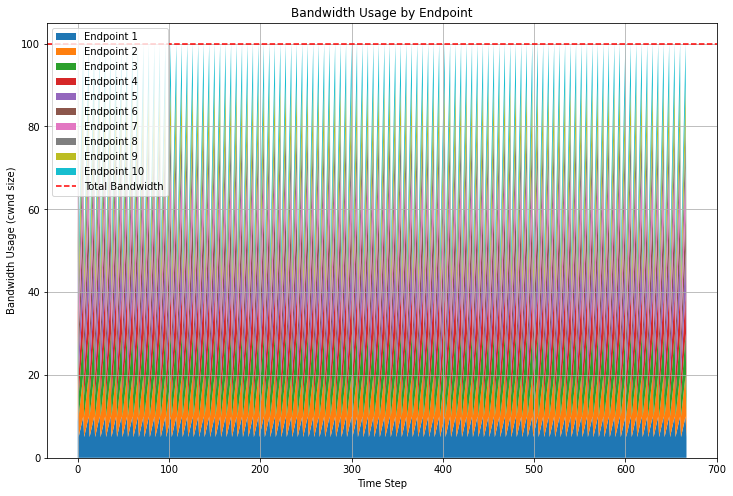

In [9]:
draw_bandwidth_usage_chart(cable_10)

In [10]:
cal_metrics(usage, cable_10.bandwidth)

Mean Utilization: 0.7503748125937031
Recovery Speed: 6
No of Congestion: 112


### Datacentre application: 

In [29]:
# lets assume the data centre has knowledge on how many endpoints are connected simultaneously
# AI: High speed TCP:  cwnd = cwnd + 10/cwnd^0.5
# MD: cwnd = cwnd*0.7

cable_10 = Cable(100)

for i in range(0, 10):
    endpoint = Endpoint(t=0, l=5000, a=1, b=0.7, cwnd=10)
    cable_10.add_endpoint(endpoint)
    
usage = cable_10.transfer_data()
print(usage)


Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded during transfer. Stopping further transfers.
No congestion. Continue transfer.
Bandwidth exceeded d

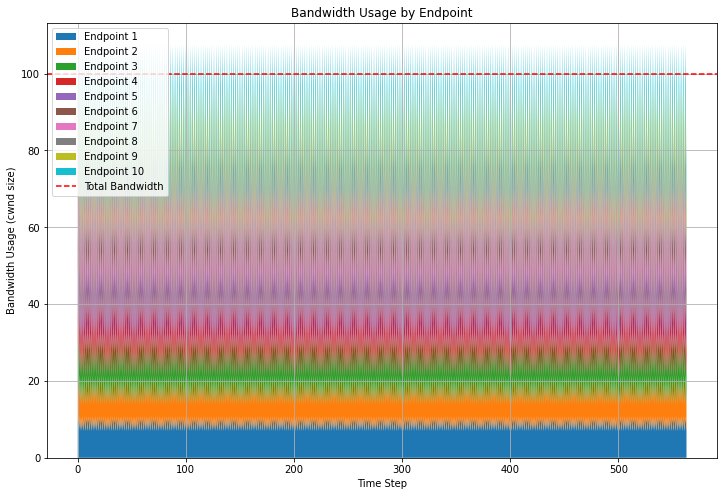

In [30]:
draw_bandwidth_usage_chart(cable_10)

In [31]:
cal_metrics(usage, cable_10.bandwidth)

Mean Utilization: 0.8891794261378204
Recovery Speed: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
No of Congestion: 281
